# Fun Analysis : New Ownership? New Era for Newcastle United? Performance Analysis Newcastle United in English Premier League 2021/2022

The English Premier League(EPL) is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League. Seasons typically run from August to May with each team playing 38 matches (home and away matches). The total number of games played in the league per season is 380 and the maximun number of points each team can earn is 114.  **Manchester City F.C 🏆**  is the current champion at this season (5th title).


In this notebook, we will look the performance for Newcastle United at this season 21/22. 

To do so, we are talking about

1. Newcastle United and EPL Table 21/22
2. All Newcastle United EPL Match 21/22

Let's go

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

## Newcastle United and EPL 21/22 Table

In this section, we are using EPL table to identify
- the teams that are qualified for Champion League and Europa League
- relegated team and promoted team
- Compare the number of pts of Newcastle United with others team in the table   
- worst attack ranking
- worst defend ranking

In [77]:
df=pd.read_csv('soccer21-22.csv')
df.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


First we check if there any data duplicated or missing

In [78]:
df[df.duplicated()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [79]:
df.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

There is no missing or duplicated data so we can processing the data into proper EPL Table

In [80]:
df.HomeTeam.unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [81]:
df.AwayTeam.unique()

array(['Arsenal', 'Leeds', 'Brighton', 'Crystal Palace', 'Southampton',
       'Wolves', 'Aston Villa', 'Liverpool', 'West Ham', 'Man City',
       'Burnley', 'Newcastle', 'Brentford', 'Everton', 'Norwich',
       'Watford', 'Man United', 'Tottenham', 'Chelsea', 'Leicester'],
      dtype=object)

In [82]:
df.shape

(380, 22)

In [83]:
no_of_teams = 20
home_and_away = 2
no_of_matches_per_week = no_of_teams/2
number_of_matches = home_and_away*(no_of_teams-1)*no_of_matches_per_week
number_of_matches == df.shape[0]

True

In [84]:
df.HomeTeam.value_counts()

Brentford         19
Man United        19
Arsenal           19
Wolves            19
Southampton       19
Brighton          19
Man City          19
Leeds             19
Crystal Palace    19
Aston Villa       19
Liverpool         19
Tottenham         19
Newcastle         19
Norwich           19
Watford           19
Leicester         19
Everton           19
Chelsea           19
Burnley           19
West Ham          19
Name: HomeTeam, dtype: int64

In [85]:
df.AwayTeam.value_counts()

Arsenal           19
Leeds             19
Chelsea           19
Tottenham         19
Man United        19
Watford           19
Norwich           19
Everton           19
Brentford         19
Newcastle         19
Burnley           19
Man City          19
West Ham          19
Liverpool         19
Aston Villa       19
Wolves            19
Southampton       19
Crystal Palace    19
Brighton          19
Leicester         19
Name: AwayTeam, dtype: int64

In [86]:
table = pd.DataFrame(list(df.HomeTeam.unique()),columns = ['Team'])
table

,Team
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton
5,Leicester
6,Watford
7,Norwich
8,Newcastle
9,Tottenham


Let's define these columns

- Played: Played (number of matches played by a team)
- Win: number of matches won
- Draw: number of times a team has finish a match with an even score or tie
- Lost: number of matches lost
- GF: Goals For (number of goals by a team)
- GA: Goals Against (number of goals conceded by a team)
- GD: Goal Difference (difference between GF and GA)
- Points : Point for a team (W : 3 Points , D : 1 Point , L : 0 Point)

In [87]:
table[['Played','Win','Draw','Loss','GF','GA','GD','Points']] = 0
table = table.set_index('Team')
table

,Played,Win,Draw,Loss,GF,GA,GD,Points
Team,,,,,,,,
Brentford,0,0,0,0,0,0,0,0
Man United,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0
Leicester,0,0,0,0,0,0,0,0
Watford,0,0,0,0,0,0,0,0
Norwich,0,0,0,0,0,0,0,0
Newcastle,0,0,0,0,0,0,0,0


Then we extract the all fixture into the table

In [88]:
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]
    table.loc[home,'Played'] += 1
    table.loc[away,'Played'] += 1
    table.loc[home,'GF'] += df.FTHG.loc[i]
    table.loc[away,'GF'] += df.FTAG.loc[i]
    table.loc[home,'GA'] += df.FTAG.loc[i]
    table.loc[away,'GA'] += df.FTHG.loc[i]
    if df.loc[i,'FTR'] == "H":
        table.loc[home,'Win'] += 1
        table.loc[away,'Loss'] += 1
    elif df.loc[i,'FTR'] == "A":
        table.loc[away,'Win'] += 1
        table.loc[home,'Loss'] += 1
    else:
        table.loc[away,'Draw'] += 1
        table.loc[home,'Draw'] += 1
table['Points'] = 3*table['Win'] + table['Draw']
table['GD'] = table['GF'] - table['GA']

In [89]:
table = table.sort_values(by='Points', ascending=False)
table = table.reset_index()
cl = ['Man City', 'Liverpool', 'Chelsea','Tottenham']
el = ['Arsenal']
relegate = ['Burnley','Watford','Norwich']
cl_style = 'color:white; background-color:darkgreen;text-shadow: 3px 3px 3px black;'
tott_style = 'color:white;background-color:darkorange;text-shadow: 3px 3px 3px black;'
el_style = 'color:white;background-color:darkblue;text-shadow: 3px 3px 3px black;'
rel_style = 'color:white;background-color:darkred;text-shadow: 3px 3px 3px black;'
t1 = table.style.\
applymap(lambda v:  cl_style if v in cl  else None)\
.applymap(lambda v: tott_style  if v in ['Man United', 'West Ham']  else None)\
.applymap(lambda v: el_style  if v in el  else None)\
.applymap(lambda v: rel_style  if v in relegate  else None)
t1.set_caption('⚽ EPL Table Season 2021-2022 ⚽')

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Man City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Man United,38,16,10,12,57,57,0,58
6,West Ham,38,16,8,14,60,51,9,56
7,Leicester,38,14,10,14,62,59,3,52
8,Brighton,38,12,15,11,42,44,-2,51
9,Wolves,38,15,6,17,38,43,-5,51


- *Green color --> qualified for Champion League* 
- *Blue color --> qualified for Europa league*
- *Orange color --> qualified for Europa League and Europa Conference League*
- *Red color --> Relegate to English Championship*

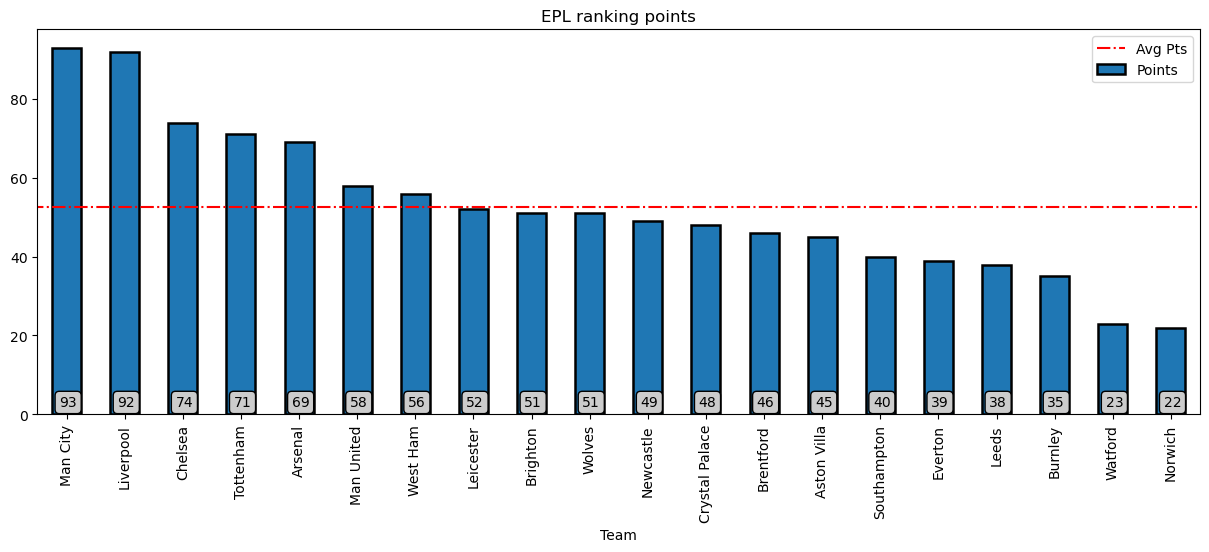

In [90]:
table.plot(x='Team', y='Points', kind='bar',figsize=(15,5), edgecolor='black', linewidth=1.8);
for i, u in enumerate(table.Points.tolist()):
        plt.annotate(str(u), xy=(i-0.1, u), xytext=(i-0.125, 2), bbox = dict(boxstyle="round", fc="0.8",
                                                                   color='black'))
plt.hlines(table.Points.mean(), -1, 20, label='Avg Pts', color='red', linestyles='dashdot');
plt.legend();
plt.title('EPL ranking points');

This result is better than last year (both points (45) or position (12)) and the gap between the avg points is just 3 points

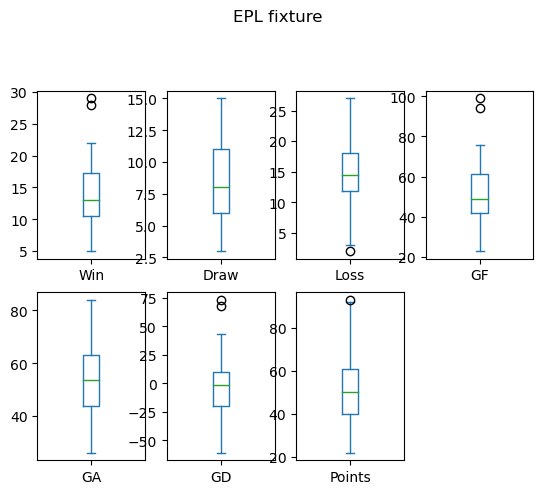

In [91]:
table.drop(columns=['Played']).plot(layout=(2, 4), subplots=True, kind='box');
plt.suptitle('EPL fixture', y=1.05);

***Manchester City***⭐ *and* ***Liverpool***⭐ *have outperformed this EPL season 21/22. (see outlier in  W, L, GF, GD and Pts chart)*

In [92]:
t2 =table.sort_values('GF', ascending=True)
vcols = t2.Team.tolist()[:5]

In [93]:
t2.head(5)[['Team','GF']].style.applymap(lambda v: el_style if v in vcols  else None)\
.set_caption(' ⚽Five worst attack ⚽ ').bar(align='mid')

,Team,GF
19,Norwich,23
17,Burnley,34
18,Watford,34
9,Wolves,38
8,Brighton,42


In [94]:
t3 =table.sort_values('GA', ascending=False)
vc = t3.Team.tolist()[:5]


In [95]:
t3.head(5)[['Team','GA']].style.applymap(lambda v: el_style if v in vc  else None)\
.set_caption('⚽ Five worst defense ⚽').bar(align='mid')

,Team,GA
19,Norwich,84
16,Leeds,79
18,Watford,77
14,Southampton,67
15,Everton,66


Thankfully Newcastle United not in the worst attacking or defending in this season

# NEWCASTLE UNITED F.C.

Newcastle United Football Club is an English professional football club, based in Newcastle upon Tyne, that plays in the Premier League – the top flight of English football. The club was founded in 1892 by the merger of Newcastle East End and Newcastle West End. The team play their home matches at St James' Park in the centre of Newcastle. Following the Taylor Report's requirement that all Premier League clubs have all-seater stadiums, the ground was modified in the mid-1990s and currently has a capacity of 52,305.

In this 2021/2022 season there are 2 interesting events in Newcastle United :
- After 14 years as owner, Ashley sold the club to a new consortium for a reported £305 million, making them the richest football club in the world. The consortium was made up of Saudi Arabia's Public Investment Fund, RB Sports & Media and PCP Capital Partners.
- On 20 October 2021, Bruce left his position by mutual consent, Eddie Howe was appointed as Bruce's replacement a few weeks later on 8 November 2021.

So season 2021/2022 might be interesting to see Newcastle United performance, Lets go

In [96]:
allresult = pd.read_csv('all_match_results.csv')

In [97]:
allresult['Date'] = pd.to_datetime(allresult['Date'])
allresult.head()

,Date,HomeTeam,Result,AwayTeam
0,2021-08-13,Brentford,2:0,Arsenal
1,2021-08-14,Burnley,1:2,Brighton and Hove Albion
2,2021-08-14,Chelsea,3:0,Crystal Palace
3,2021-08-14,Everton,3:1,Southampton
4,2021-08-14,Leicester City,1:0,Wolverhampton Wanderers


First we want to see only Newcastle United Fixtures

In [98]:
newcastle_home = allresult[allresult.HomeTeam == 'Newcastle United']
newcastle_away = allresult[allresult.AwayTeam == 'Newcastle United']

After that we want to see behavior of newcastle first leg ( < 5 January 2022) and second leg (5 January 2022 <). 

In [99]:
first_leg = newcastle_home[newcastle_home.Date < '2022-01-05'].append(newcastle_away[newcastle_away.Date < '2022-01-05']) 
second_leg = newcastle_home[newcastle_home.Date > '2022-01-05'].append(newcastle_away[newcastle_away.Date > '2022-01-05']) 

Then we define the decision (win,draw or lose) , gf, ga

In [100]:
def wdl_home(data):
    
    decision = []
    gf = []
    ga = []
    home = data[data.HomeTeam == 'Newcastle United']
    
    for u, v in [row.split(':') for row in home.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('W')
            gf.append(u)
            ga.append(v)
        elif u < v:
            decision.append('L')
            gf.append(u)
            ga.append(v)
        else:
            decision.append('D')
            gf.append(u)
            ga.append(v)
    home['WDL'] = decision
    home['Scored'] = gf
    home['Conceded'] = ga
    home['GD'] = home['Scored'] - home['Conceded']
    return home

def wdl_away(data):
    
    decision = []
    gf = []
    ga = []
    
    away = data[data.AwayTeam == 'Newcastle United']
    
    for u, v in [row.split(':') for row in away.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('L')
            gf.append(v)
            ga.append(u)
        elif u < v:
            decision.append('W')
            gf.append(v)
            ga.append(u)
        else:
            decision.append('D')
            gf.append(v)
            ga.append(u)
            
    away['WDL'] = decision
    away['Scored'] = gf
    away['Conceded'] = ga
    away['GD'] = away['Scored'] - away['Conceded']
    return away

##### First Leg Result

In [101]:
first_leg.sort_values('Date', inplace=True)
first_leg.set_index('Date', inplace=True)

In [102]:
home_1stleg = wdl_home(first_leg)
away_1stleg = wdl_away(first_leg)
home_1stleg

,HomeTeam,Result,AwayTeam,WDL,Scored,Conceded,GD
Date,,,,,,,
2021-08-15,Newcastle United,2:4,West Ham United,L,2,4,-2
2021-08-28,Newcastle United,2:2,Southampton,D,2,2,0
2021-09-17,Newcastle United,1:1,Leeds United,D,1,1,0
2021-10-17,Newcastle United,2:3,Tottenham Hotspur,L,2,3,-1
2021-10-30,Newcastle United,0:3,Chelsea,L,0,3,-3
2021-11-20,Newcastle United,3:3,Brentford,D,3,3,0
2021-11-30,Newcastle United,1:1,Norwich City,D,1,1,0
2021-12-04,Newcastle United,1:0,Burnley,W,1,0,1
2021-12-19,Newcastle United,0:4,Manchester City,L,0,4,-4


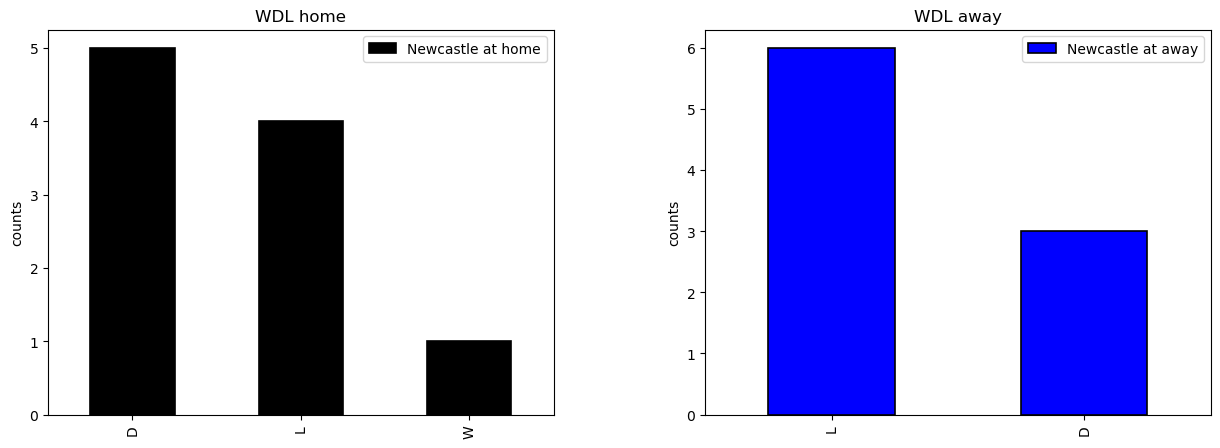

In [103]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
home_1stleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at home',
                                        color='black', ax=ax1);
ax1.set_ylabel('counts')
ax1.set_title('WDL home')
ax1.legend();
away_1stleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at away',
                                        color='blue', ax=ax2);
ax2.set_title('WDL away')
ax2.set_ylabel('counts')
ax2.legend();

- *At St James Park, Newcastle United have **`won 1 games, lost 4 games and draw 5 game`**.*
- *At away, Newcastle United have **`won 0 games, lost 6 games and 3 draw`**.*

*At the end of the EPL first leg , Newcastle United **`won 1 games, lost 10 games and draw 8 games`** that give us **`11 pts over 57`**. At this condition, Newcastle can be relegated .*

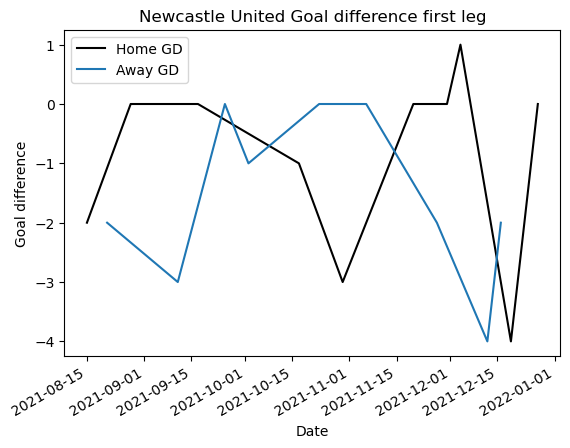

In [104]:
home_1stleg.GD.plot(color='black',label='Home GD');
away_1stleg.GD.plot(label='Away GD');
plt.legend();
plt.ylabel('Goal difference');
plt.title('Newcastle United Goal difference first leg');

*This chart shows that Newcastle often conceded goal that mean the defense cleary rubbish*. *We can also say that Newcastle United have a problem with the attack.*

In [105]:
home_1stleg.mean()

Scored      1.3
Conceded    2.2
GD         -0.9
dtype: float64

clearly Newcastle have some problem with the defense.

In [106]:
away_1stleg.mean()

Scored      0.666667
Conceded    2.222222
GD         -1.555556
dtype: float64

at away have same problem with the defense and the attack now become problem too

From home and away stats, Newcastle must improve their defense if they dont wanna go to championship (tier 2 English league).

##### Second Leg

In this second leg, there was a window transfer. Newcastle bought 4 players and loaned 1 player, they were Bruno Guimares,Chris Wood,Dan Burn,Kieran Trippier, Matt Target (Loan). 4 out 5 player were more defensive position, and one striker (Chris Wood). From first leg we know Newcastle defense was rubbish, in this transfer we can see that Newcastle want to improve their defense.   

So lets take a look at second leg

In [107]:
second_leg.sort_values('Date', inplace=True)
second_leg.set_index('Date', inplace=True)

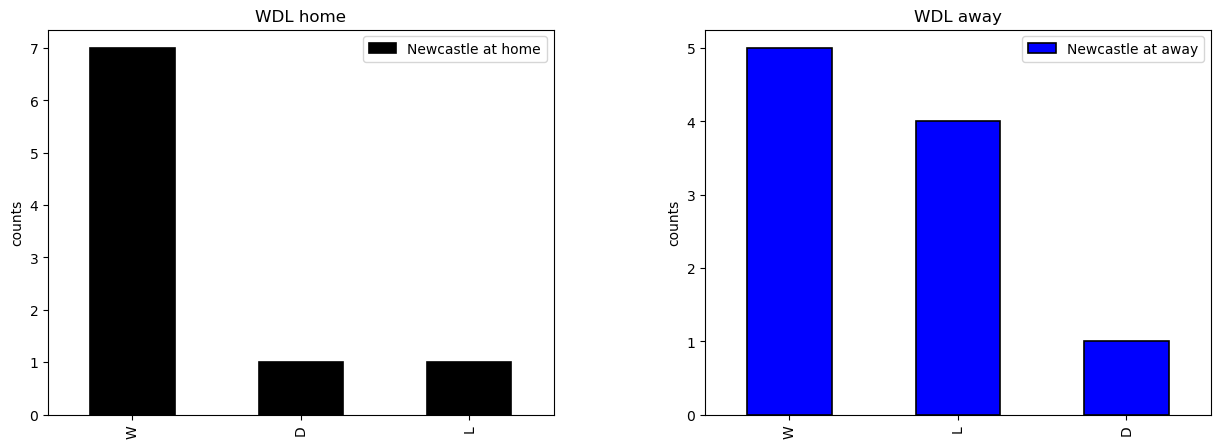

In [108]:
home_2ndleg = wdl_home(second_leg)
away_2ndleg = wdl_away(second_leg)
fig1 = plt.figure(figsize=(15, 5))
fig1.subplots_adjust(wspace=0.3)
axis1 = fig1.add_subplot(1,2,1)
axis2 = fig1.add_subplot(1,2,2)
home_2ndleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at home',
                                        color='black', ax=axis1);
axis1.set_ylabel('counts')
axis1.set_title('WDL home')
axis1.legend();
away_2ndleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at away',
                                        color='blue', ax=axis2);
axis2.set_title('WDL away')
axis2.set_ylabel('counts')
axis2.legend();

- *At St James Park, Newcastle United have **`won 7 games, lost 1 games and draw 1 game`**.*
- *At away, Newcastle United have **`won 5 games, lost 4 games and 1 draw`**.*

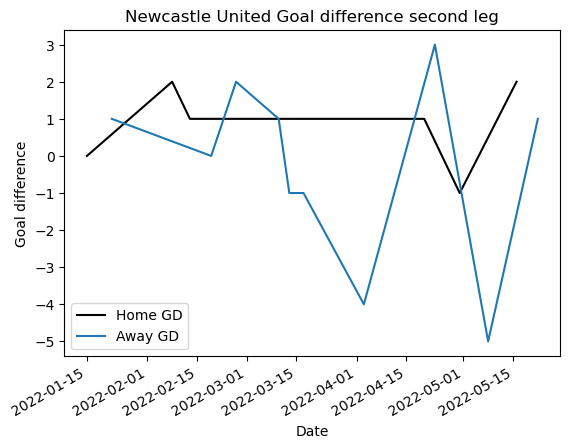

In [109]:
home_2ndleg.GD.plot(color='black',label='Home GD');
away_2ndleg.GD.plot(label='Away GD');
plt.legend()
plt.ylabel('Goal difference');
plt.title('Newcastle United Goal difference second leg');

We can see that Newcastle United defense was improving, the goal different was better than the first leg which mean the transfer was a success.

In [110]:
home_2ndleg.mean()

Scored      1.444444
Conceded    0.555556
GD          0.888889
dtype: float64

Newcastle improving in their home, in the first leg they conceded avg 2.2 and now only 0.5

In [111]:
away_2ndleg.mean()

Scored      1.2
Conceded    1.5
GD         -0.3
dtype: float64

At Away the defense slightly improve, but we can appreciate they scored more in away than the first leg

In [112]:
def homeResult(row):
    H, A = row.split(':')
    
    if int(H) > int(A):
        return 'W'
    elif int(H) < int(A):
        return 'L'
    else:
        return 'D'
    
def awayResult(row):
    H, A = row.split(':')
    
    if int(H) > int(A):
        return 'L'
    elif int(H) < int(A):
        return 'W'
    else:
        return 'D'

def gdhome(row):
    H, A = row.split(':')
    return int(H) - int(A)

def gdaway(row):
    H, A = row.split(':')
    return int(A) - int(H)

## Steve Bruce and Eddie Howe

In October 2021, the club was bought for £300 million by a consortium led by the Saudi Arabian government's sovereign wealth fund. With the team close to the bottom of the Premier League, Bruce was widely expected to be dismissed from his job by the new owners, but remained in charge .Newcastle lost that match 3–2 to Tottenham Hotspur at St James' Park on 17 October 2021, and some Newcastle supporters called for Bruce to be removed from his post during and after the game.Bruce left Newcastle by mutual consent three days later on 20 October 2021.

After that caretaker manager took the position until Howe was appointed to replace Steve Bruce as the manager of Premier League club Newcastle United on 8 November 2021, signing a contract until the summer of 2024.


So we lets take a look the match between them

In [113]:
steve_era = newcastle_home[newcastle_home.Date < '2021-11-08'].append(newcastle_away[newcastle_away.Date < '2021-11-08']) 
howe_era = newcastle_home[newcastle_home.Date > '2021-11-08'].append(newcastle_away[newcastle_away.Date > '2021-11-08']) 

In [114]:
steve_era.sort_values('Date', inplace=True)
steve_era.set_index('Date', inplace=True)

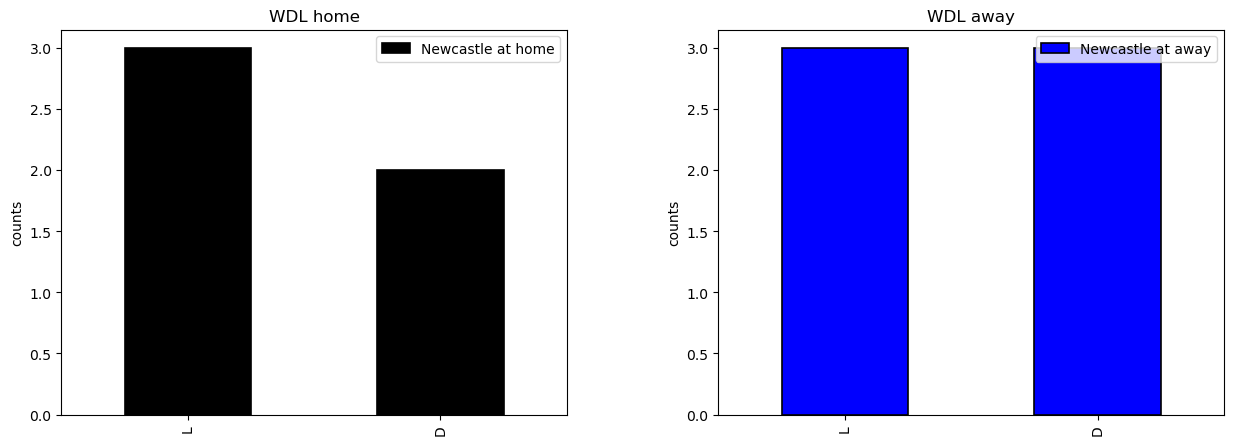

In [115]:
home_steve = wdl_home(steve_era)
away_steve = wdl_away(steve_era)
fig1 = plt.figure(figsize=(15, 5))
fig1.subplots_adjust(wspace=0.3)
axis1 = fig1.add_subplot(1,2,1)
axis2 = fig1.add_subplot(1,2,2)
home_steve.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at home',
                                        color='black', ax=axis1);
axis1.set_ylabel('counts')
axis1.set_title('WDL home')
axis1.legend();
away_steve.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at away',
                                        color='blue', ax=axis2);
axis2.set_title('WDL away')
axis2.set_ylabel('counts')
axis2.legend();

In Steve Era (season 2021/2022), Newcastle never win and only get 5 points over 33 points. No wonder Newcastle fans want him to removed from his position.

In [116]:
howe_era.sort_values('Date', inplace=True)
howe_era.set_index('Date', inplace=True)

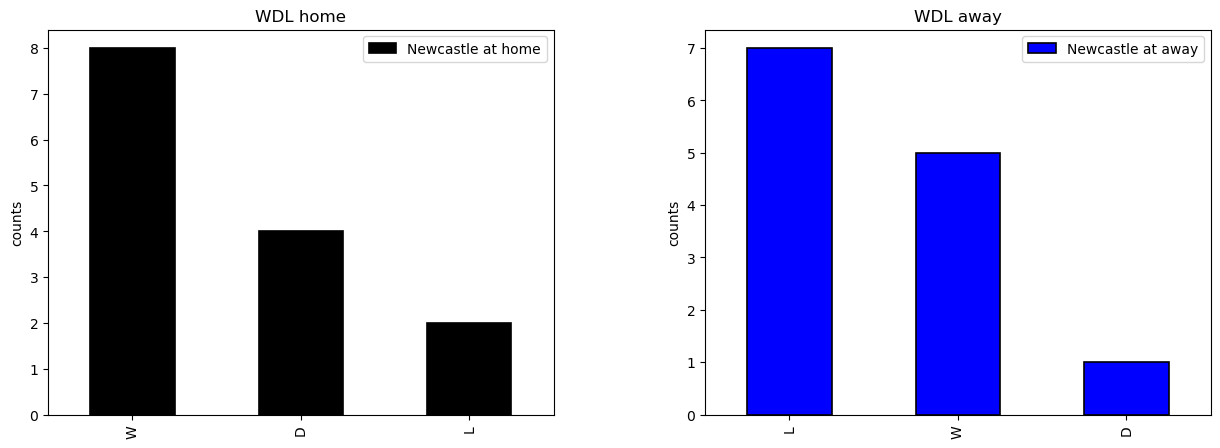

In [117]:
home_howe = wdl_home(howe_era)
away_howe = wdl_away(howe_era)
fig1 = plt.figure(figsize=(15, 5))
fig1.subplots_adjust(wspace=0.3)
axis1 = fig1.add_subplot(1,2,1)
axis2 = fig1.add_subplot(1,2,2)
home_howe.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at home',
                                        color='black', ax=axis1);
axis1.set_ylabel('counts')
axis1.set_title('WDL home')
axis1.legend();
away_howe.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Newcastle at away',
                                        color='blue', ax=axis2);
axis2.set_title('WDL away')
axis2.set_ylabel('counts')
axis2.legend();

Howe era better than Bruce era, Newcastle got 13 Wins and 44 points over 81. 

We want to look the Newcastle position when Steve Era and Howe Era

In [118]:
week_match = allresult.copy()

In [119]:
table1=pd.read_csv('points_table.csv')

First we want to calculate the points for all teams each fixtures.

In [120]:
week_match['IsHomeTeam'] = week_match['Result'].apply(homeResult)
week_match['IsAwayTeam'] = week_match['Result'].apply(awayResult)

In [121]:
week_match['GDHomeTeam'] = week_match['Result'].apply(gdhome)
week_match['GDAwayTeam'] = week_match['Result'].apply(gdaway)

In [122]:
week_match

,Date,HomeTeam,Result,AwayTeam,IsHomeTeam,IsAwayTeam,GDHomeTeam,GDAwayTeam
0,2021-08-13,Brentford,2:0,Arsenal,W,L,2,-2
1,2021-08-14,Burnley,1:2,Brighton and Hove Albion,L,W,-1,1
2,2021-08-14,Chelsea,3:0,Crystal Palace,W,L,3,-3
3,2021-08-14,Everton,3:1,Southampton,W,L,2,-2
4,2021-08-14,Leicester City,1:0,Wolverhampton Wanderers,W,L,1,-1
...,...,...,...,...,...,...,...,...
375,2022-05-22,Crystal Palace,1:0,Manchester United,W,L,1,-1
376,2022-05-22,Leicester City,4:1,Southampton,W,L,3,-3
377,2022-05-22,Liverpool,3:1,Wolverhampton Wanderers,W,L,2,-2
378,2022-05-22,Manchester City,3:2,Aston Villa,W,L,1,-1


In [123]:
teams = table1['Team'].tolist()
club = {}
for t in teams:
    
    game_week = {}
    game_week[0] = 0
    data_t = week_match[week_match.HomeTeam == t].append(week_match[week_match.AwayTeam == t])
    data_t.sort_values('Date', inplace=True)
    weeks = data_t.Date.tolist()
    
    for i, w in enumerate(weeks):
    
    
        data_week = data_t[data_t.Date == w]
        
        i = i+1
        #print(data_week)
        
        if t in data_week.HomeTeam.tolist():
            
            if data_week.IsHomeTeam.values[0] == 'W':
                game_week[i] = game_week[i-1] + 3
                
            elif data_week.IsHomeTeam.values[0] == 'L':
                game_week[i] = game_week[i-1]
            else:
                game_week[i] = game_week[i-1] + 1
        
        if t in data_week.AwayTeam.tolist():
            if data_week.IsAwayTeam.values[0] == 'W':
                game_week[i] = game_week[i-1] + 3
            elif data_week.IsAwayTeam.values[0] == 'L':
                game_week[i] = game_week[i-1]
            else:
                game_week[i] = game_week[i-1] + 1
                
       
        
    club[t] = {f'Week {w+1}': game_week[w+1] for w in range(len(weeks))}

then the we change it become dataframe so we can graph it

In [141]:
club = pd.DataFrame(club)

In [142]:
club

,Manchester City,Liverpool,Chelsea,Tottenham Hotspur,Arsenal,Manchester United,West Ham United,Leicester City,Brighton and Hove Albion,Wolverhampton Wanderers,Newcastle United,Crystal Palace,Brentford,Aston Villa,Southampton,Everton,Leeds United,Burnley,Watford,Norwich City
Week 1,0,3,3,3,0,3,3,3,3,0,0,0,3,0,0,3,0,0,3,0
Week 2,3,6,6,6,0,4,6,3,6,0,0,1,4,3,1,4,1,0,3,0
Week 3,6,7,7,9,0,7,7,6,6,0,1,2,5,4,2,7,2,1,3,0
Week 4,9,10,10,9,3,10,8,6,9,3,1,5,5,4,3,10,2,1,3,0
Week 5,10,13,13,9,6,13,8,6,12,3,2,5,8,7,4,10,3,1,6,0
Week 6,13,14,13,9,9,13,11,7,13,6,3,6,9,10,4,13,3,2,7,0
Week 7,14,15,16,12,10,14,11,8,14,9,3,7,12,10,4,14,6,3,7,1
Week 8,17,18,19,15,11,14,14,11,15,12,3,8,12,10,7,14,6,3,7,2
Week 9,20,21,22,15,14,14,17,14,15,13,4,9,12,10,8,14,7,4,10,2
Week 10,20,22,25,15,17,17,20,14,16,16,4,12,12,10,11,14,10,7,10,2


In [144]:
newcastle_season = club['Newcastle United'].reset_index()


<AxesSubplot:>

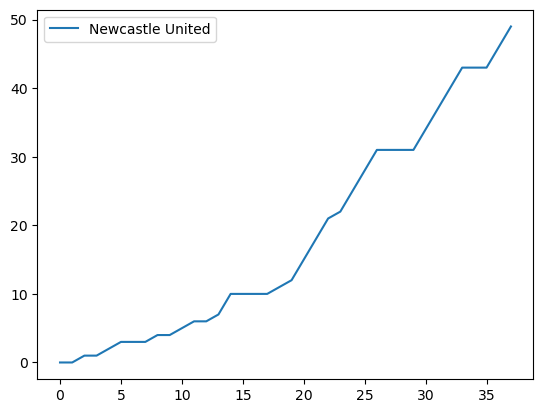

In [145]:
sns.lineplot(data=newcastle_season)

Steve era was between week 1 until week 11, we can see from the graph Newcastle was on the second bottom of the table. Newcastle can relegated to championships if still like this. So the decision changing the manager is really good because there is improvement from 18th position become 11th position and this position better than 1 season before (12th).

We can say the new ownership and Eddie Howe make improvement on Newcastle at season 2021/2022. Winter transfer was a hit for Newcastle, thanks to the owner money. Eddie howe make the Newcastle defense and attack better  but, we can't say yet Newcaste will be a big club if we only see one season.